# Avant de commencer, veuillez installer les packages nécessaires via le code suivant :
*pip install -r requirements.txt*


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import r2_score


# Chargement des données (provenant du csv)

In [3]:
df = pd.read_csv("airbnb_data.csv")

print("le fichier contient", df.shape[0], "lignes et", df.shape[1], "colonnes")

le fichier contient 91031 lignes et 75 colonnes


# Sélection et nettoyage des données

In [4]:
df = df[['name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
         'minimum_nights', 'number_of_reviews', 'accommodates', 'bedrooms', 'beds',
         'review_scores_rating', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type']]

df = df.drop_duplicates()
df = df.dropna()
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Analyse des prix et des nuits minimums (avec valeurs aberrantes)


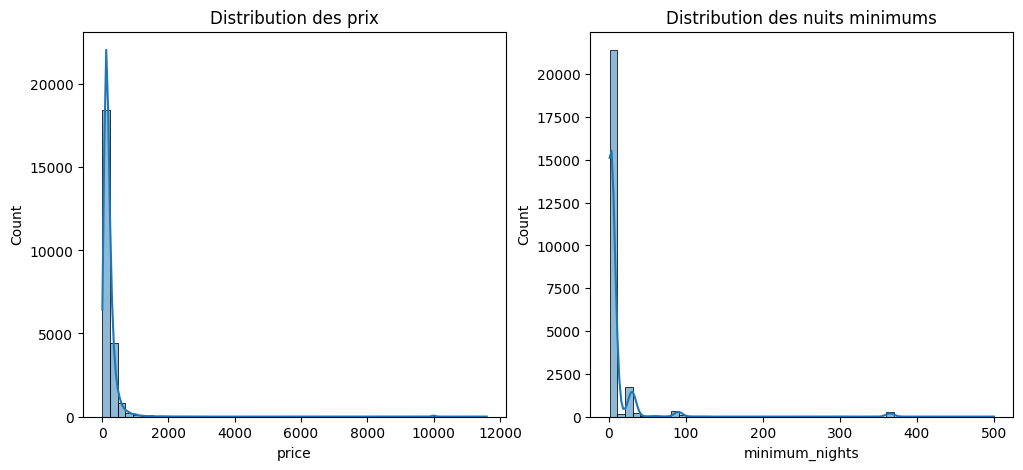

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution des prix")

plt.subplot(1,2,2)
sns.histplot(df['minimum_nights'], bins=50, kde=True)
plt.title("Distribution des nuits minimums")
plt.show()

# Analyse des prix dans tout paris

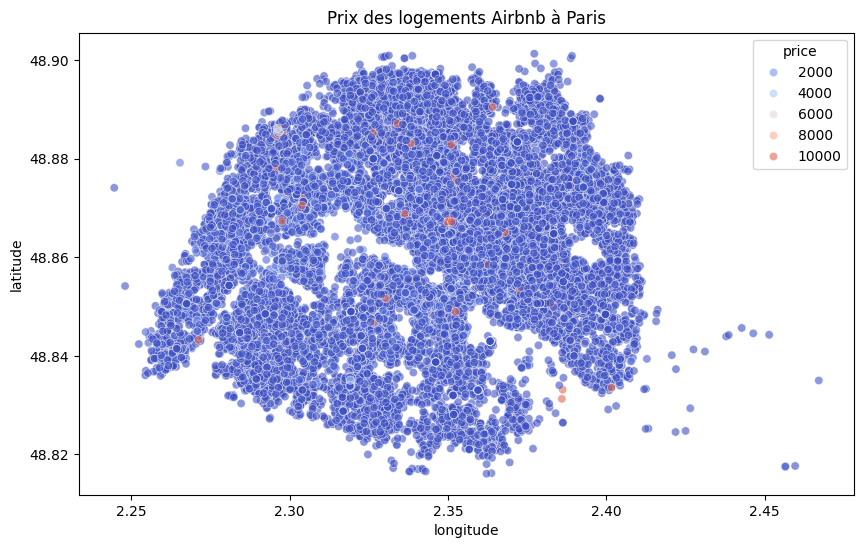

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price', palette="coolwarm", alpha=0.6)
plt.title("Prix des logements Airbnb à Paris")
plt.show()

# Analyse des prix par arrondissement

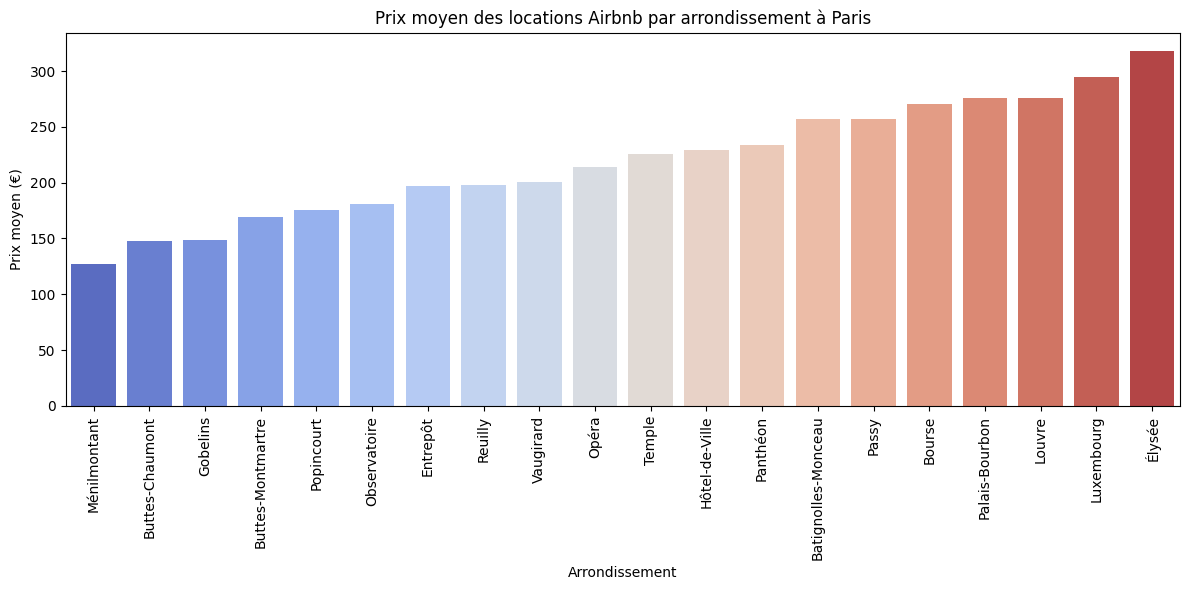

In [7]:
plt.figure(figsize=(12,6))
arrondissement_price = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values()
sns.barplot(x=arrondissement_price.index, y=arrondissement_price.values, hue=arrondissement_price.index, palette="coolwarm", legend=False)
plt.xticks(rotation=90)
plt.xlabel("Arrondissement")
plt.ylabel("Prix moyen (€)")
plt.title("Prix moyen des locations Airbnb par arrondissement à Paris")
plt.tight_layout() 
plt.show()

# Analyse des prix moyens par type de propriété


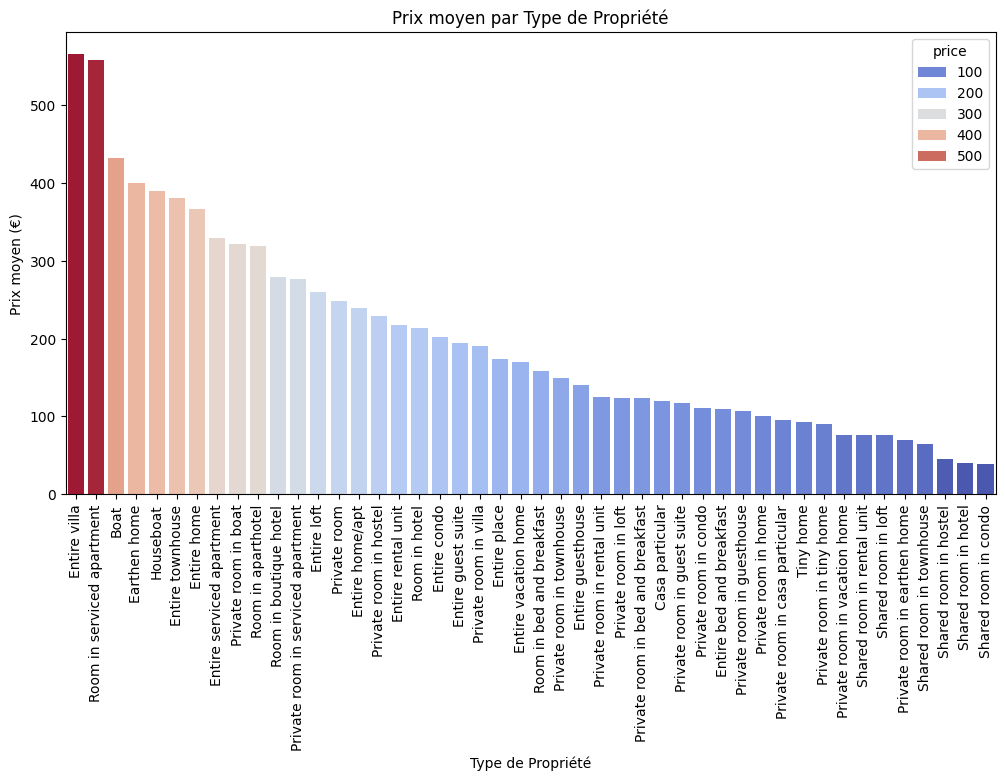

In [8]:
prix_par_type = df.groupby('property_type')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=prix_par_type.index, y=prix_par_type.values, hue=prix_par_type, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Type de Propriété")
plt.ylabel("Prix moyen (€)")
plt.title("Prix moyen par Type de Propriété")
plt.show()

Nombre de valeurs aberrantes pour 'price' : 1621
Nombre de données aberrantes supprimés : 1621


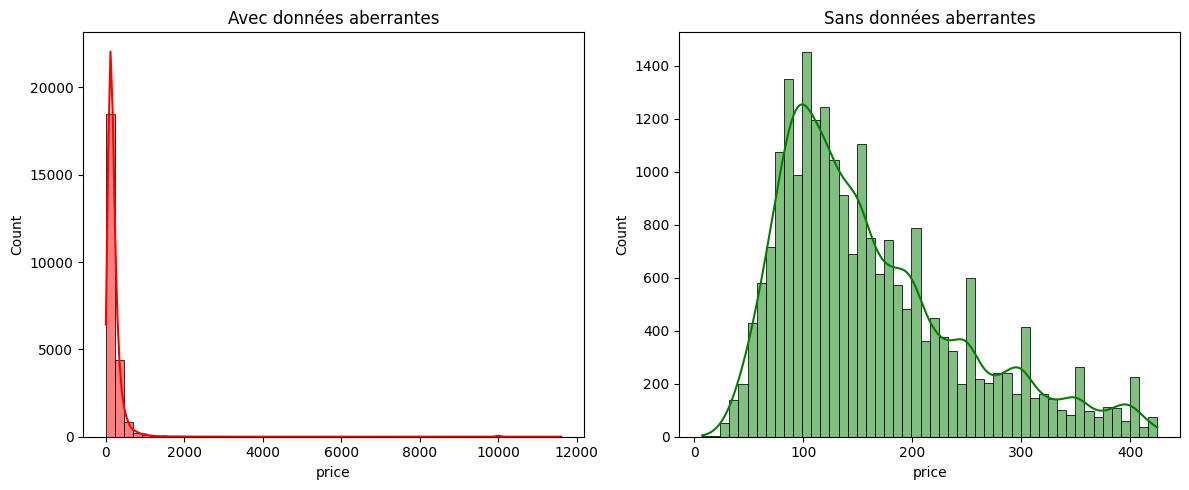

In [16]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dt_aber = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Nombre de valeurs aberrantes pour 'price' : {dt_aber.shape[0]}")
# print(dt_aber[['name', 'price']])

# suppression valeurs aberrantes
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

dt_aber_count = len(df) - len(df_clean)
print(f"Nombre de données aberrantes supprimés : {dt_aber_count}")

# ava,nt après
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color='red')
plt.title("Avec données aberrantes")

plt.subplot(1, 2, 2)
sns.histplot(df_clean['price'], bins=50, kde=True, color='green')
plt.title("Sans données aberrantes")

plt.tight_layout()
plt.show()

# D Régression Linéaire & Multiple

Coefficient de détermination R² : 0.269


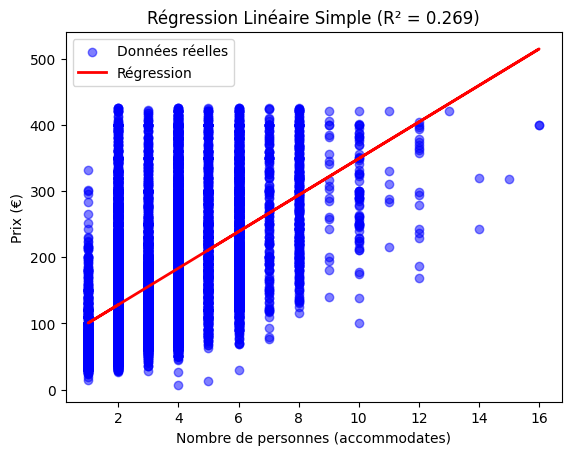

In [30]:
X = df_clean[['accommodates']]
y = df_clean['price']

model_simple = LinearRegression()
model_simple.fit(X, y)

# predictio
y_pred = model_simple.predict(X)

# coef en R²
r2 = r2_score(y, y_pred)
print(f"Coefficient de détermination R² : {r2:.3f}")

plt.scatter(X, y, color='blue', alpha=0.5, label='Données réelles')
plt.plot(X, y_pred, color='red', linewidth=2, label='Régression')
plt.xlabel("Nombre de personnes (accommodates)")
plt.ylabel("Prix (€)")
plt.title(f"Régression Linéaire Simple (R² = {r2:.3f})")
plt.legend()
plt.show()